In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

In [2]:
cwd =os.getcwd()
os.chdir("/Users/luqingqi/Desktop/Project")

In [3]:
df = pd.read_csv('Match_Data_PP.csv')

In [388]:
hf = pd.read_csv('point_settings (1).csv')

In [4]:
df

,Unnamed: 0,gamelength,result,KDA,firstblood,firstdragon,dragons,opp_dragons,infernals,mountains,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,1,1782,1,16.00,1,1,4,0,1,2,...,490,5018,4255,86,8,13,3,3,4,8
1,2,1782,0,0.38,0,0,0,4,0,0,...,576,-5018,-4255,-86,3,4,8,8,13,3
2,3,1753,0,1.39,1,0,0,4,0,0,...,566,573,-1879,-49,3,9,2,2,5,3
3,4,1753,1,8.71,0,1,4,0,1,0,...,517,-573,1879,49,2,5,3,3,9,2
4,5,1777,0,1.30,1,0,0,4,0,0,...,514,-579,-1643,-40,3,3,4,4,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,24328,1568,0,0.91,0,1,2,1,0,1,...,516,-1094,-1075,-22,3,4,5,5,9,3
17593,24329,2071,0,1.43,0,0,1,4,1,0,...,477,-4390,-3848,-27,5,5,8,8,11,5
17594,24330,2071,1,5.07,1,1,4,1,2,1,...,450,4390,3848,27,8,11,5,5,5,8
17595,24331,1909,0,1.19,1,0,1,3,0,1,...,473,-1784,-3876,-21,3,6,7,7,9,3


In [13]:
df=df.drop('Unnamed: 0', axis =1)

KeyError: "['Unnamed: 0'] not found in axis"

In [14]:
df.dtypes

gamelength              int64
result                  int64
KDA                   float64
firstblood              int64
firstdragon             int64
dragons                 int64
opp_dragons             int64
infernals               int64
mountains               int64
clouds                  int64
oceans                  int64
elders                  int64
opp_elders              int64
firstherald             int64
heralds                 int64
opp_heralds             int64
firstbaron              int64
barons                  int64
opp_barons              int64
firsttower              int64
towers                  int64
opp_towers              int64
firstmidtower           int64
firsttothreetowers      int64
inhibitors              int64
opp_inhibitors          int64
damagetochampions       int64
wardsplaced             int64
wardskilled             int64
controlwardsbought      int64
visionscore             int64
totalgold               int64
earnedgold              int64
goldspent 

In [7]:
[sum(df[i].isnull()) for i in df.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Data imputation 

In [8]:
categorical_var = list(set(df.dtypes[df.dtypes == object].index))
numerical_var = list(set(df.columns) - set(df.dtypes[df.dtypes == object].index))
df[categorical_var] = df[categorical_var].fillna(df[categorical_var].mode(),
                                                inplace = False)
df[numerical_var] = df[numerical_var].fillna(df[numerical_var].median(),
                                                inplace = False)
[sum(df[i].isnull()) for i in df.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [9]:
df.dtypes

gamelength              int64
result                  int64
KDA                   float64
firstblood              int64
firstdragon             int64
dragons                 int64
opp_dragons             int64
infernals               int64
mountains               int64
clouds                  int64
oceans                  int64
elders                  int64
opp_elders              int64
firstherald             int64
heralds                 int64
opp_heralds             int64
firstbaron              int64
barons                  int64
opp_barons              int64
firsttower              int64
towers                  int64
opp_towers              int64
firstmidtower           int64
firsttothreetowers      int64
inhibitors              int64
opp_inhibitors          int64
damagetochampions       int64
wardsplaced             int64
wardskilled             int64
controlwardsbought      int64
visionscore             int64
totalgold               int64
earnedgold              int64
goldspent 

## Drop derived variables 

In [11]:
df=df.drop(['board_id','board_title','creation_date','avg_number_of_posts','avg_total_word_count','avg_number_of_comments','avg_number_of_links_shared','avg_number_of_multimedia_items_shared','avg_number_of_posts_percentile','avg_total_word_count_percentile','avg_number_of_comments_percentile','avg_number_of_links_shared_percentile','avg_number_of_multimedia_items_shared_percentile','sharing_score','avg_number_of_hyperlinks_clicked','avg_number_of_posts_viewed_percentile','avg_number_of_hyperlinks_clicked_percentile','avg_number_of_reactions_given','avg_number_of_connections',':network/name','end_date'],axis=1)

KeyError: "['board_id' 'board_title' 'creation_date' 'avg_number_of_posts'\n 'avg_total_word_count' 'avg_number_of_comments'\n 'avg_number_of_links_shared' 'avg_number_of_multimedia_items_shared'\n 'avg_number_of_posts_percentile' 'avg_total_word_count_percentile'\n 'avg_number_of_comments_percentile'\n 'avg_number_of_links_shared_percentile'\n 'avg_number_of_multimedia_items_shared_percentile' 'sharing_score'\n 'avg_number_of_hyperlinks_clicked'\n 'avg_number_of_posts_viewed_percentile'\n 'avg_number_of_hyperlinks_clicked_percentile'\n 'avg_number_of_reactions_given' 'avg_number_of_connections'\n ':network/name' 'end_date'] not found in axis"

In [352]:
df=df.drop(['avg_number_of_posts_viewed','avg_accolade_value','avg_number_of_connections_percentile','avg_number_of_reactions_given_percentile'],axis=1)

In [353]:
[sum(df[i].isnull()) for i in df.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [354]:
df.dtypes

:board-computed-fields/hyperlink-click-count       float64
:board-computed-fields/orphaned-posts-count        float64
:board-computed-fields/days-since-start            float64
:board-computed-fields/multimedia-count            float64
:board-computed-fields/connected-users-count       float64
:board-computed-fields/reactions-count             float64
:board-computed-fields/post-views-count            float64
:board-computed-fields/hyperlink-count             float64
:board-computed-fields/follower-count              float64
:board-computed-fields/comment-count               float64
:board-computed-fields/word-count                  float64
:board-computed-fields/post-count                  float64
:board-computed-fields/mentions-count              float64
conversation_ratio                                 float64
conversation_ratio_percentile                      float64
listening_score                                    float64
pct_of_connected_users                             float

In [355]:
df=df.drop(['conversation_ratio','conversation_ratio_percentile','listening_score','pct_of_connected_users','pct_of_posts_with_1_or_more_comments','pct_of_connected_users_percentile','pct_of_posts_with_1_or_more_comments_percentile','interacting_score'],axis=1)

In [17]:
df

,gamelength,result,KDA,firstblood,firstdragon,dragons,opp_dragons,infernals,mountains,clouds,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,1782,1,16.00,1,1,4,0,1,2,0,...,490,5018,4255,86,8,13,3,3,4,8
1,1782,0,0.38,0,0,0,4,0,0,0,...,576,-5018,-4255,-86,3,4,8,8,13,3
2,1753,0,1.39,1,0,0,4,0,0,0,...,566,573,-1879,-49,3,9,2,2,5,3
3,1753,1,8.71,0,1,4,0,1,0,1,...,517,-573,1879,49,2,5,3,3,9,2
4,1777,0,1.30,1,0,0,4,0,0,0,...,514,-579,-1643,-40,3,3,4,4,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,1568,0,0.91,0,1,2,1,0,1,1,...,516,-1094,-1075,-22,3,4,5,5,9,3
17593,2071,0,1.43,0,0,1,4,1,0,0,...,477,-4390,-3848,-27,5,5,8,8,11,5
17594,2071,1,5.07,1,1,4,1,2,1,1,...,450,4390,3848,27,8,11,5,5,5,8
17595,1909,0,1.19,1,0,1,3,0,1,0,...,473,-1784,-3876,-21,3,6,7,7,9,3


In [15]:
df_before = df
df_after = df.drop(['gamelength','totalgold','killsat15','deathsat15','opp_killsat15','earnedgold','infernals','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','opp_deathsat15','visionscore','goldspent','heralds','mountains','result','dragons','towers','opp_towers','wardsplaced','minionkills','opp_goldat15'], axis=1)




X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)


series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)


print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

/Users/luqingqi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const                 2.415326e+07
gamelength            1.480017e+08
result                1.041802e+01
KDA                   1.906621e+00
firstblood            1.272485e+00
firstdragon           1.458592e+00
dragons                        inf
opp_dragons           8.472421e+00
infernals                      inf
mountains                      inf
clouds                         inf
oceans                         inf
elders                         inf
opp_elders            1.184407e+00
firstherald           3.443951e+00
heralds               1.336232e+01
opp_heralds           1.318275e+01
firstbaron            4.098915e+00
barons                4.980038e+00
opp_barons            3.442137e+00
firsttower            2.227748e+00
towers                1.449040e+01
opp_towers            1.172656e+01
firstmidtower         2.220428e+00
firsttothreetowers    2.843504e+00
inhibitors            3.884733e+00
opp_inhibitors        4.008159e+00
damagetochampions     4.983062e+00
wardsplaced         

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 817.575674
KDA                     1.729024
firstblood              1.135802
firstdragon             1.380338
opp_dragons             2.868091
clouds                  1.316270
oceans                  1.304547
elders                  1.154120
opp_elders              1.168073
firstherald             3.002792
opp_heralds             3.499489
firstbaron              3.886852
barons                  4.251771
opp_barons              3.125719
firsttower              1.819503
firstmidtower           2.200150
firsttothreetowers      2.588678
inhibitors              2.462064
opp_inhibitors          2.441839
damagetochampions       2.117338
wardskilled             2.907596
controlwardsbought      2.418301
monsterkills            3.583051
opp_xpat15              2.857134
opp_csat15              4.469689
csdiffat15              2.533724
assistsat15             1.728514
opp_assistsat15         2.063912
dtype: float64

In [25]:
df_after.to_csv('logreg4.csv')

In [43]:
df_after.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
KDA,3.909609,24.756423
firstblood,0.004433,-2.000208
firstdragon,0.002387,-2.000222
opp_dragons,-0.028895,-0.949920
clouds,1.422905,1.980424
oceans,1.414789,1.931284
elders,4.921221,26.778651
opp_elders,4.913526,26.687727
firstherald,0.003978,-2.000212
opp_heralds,0.045547,-1.399985


array([[<AxesSubplot:title={'center':'KDA'}>,
        <AxesSubplot:title={'center':'firstblood'}>,
        <AxesSubplot:title={'center':'firstdragon'}>,
        <AxesSubplot:title={'center':'opp_dragons'}>,
        <AxesSubplot:title={'center':'clouds'}>],
       [<AxesSubplot:title={'center':'oceans'}>,
        <AxesSubplot:title={'center':'elders'}>,
        <AxesSubplot:title={'center':'opp_elders'}>,
        <AxesSubplot:title={'center':'firstherald'}>,
        <AxesSubplot:title={'center':'opp_heralds'}>],
       [<AxesSubplot:title={'center':'firstbaron'}>,
        <AxesSubplot:title={'center':'barons'}>,
        <AxesSubplot:title={'center':'opp_barons'}>,
        <AxesSubplot:title={'center':'firsttower'}>,
        <AxesSubplot:title={'center':'firstmidtower'}>],
       [<AxesSubplot:title={'center':'firsttothreetowers'}>,
        <AxesSubplot:title={'center':'inhibitors'}>,
        <AxesSubplot:title={'center':'opp_inhibitors'}>,
        <AxesSubplot:title={'center':'damagetoc

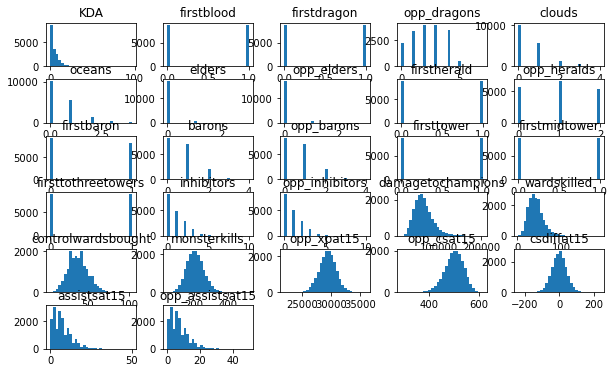

In [44]:
df_after.hist(grid=False,
       figsize=(10, 6),
       bins=30)

## Standardization

## correlation matrix

In [362]:
cf = cf.drop(['Unnamed: 0','number_of_grading_periods','periodic_max','number_of_accolades','X.board.computed.fields.days.since.start'],axis=1)

In [12]:
corr = df_after.corr()
display(corr)

NameError: name 'df_after' is not defined

<AxesSubplot:>

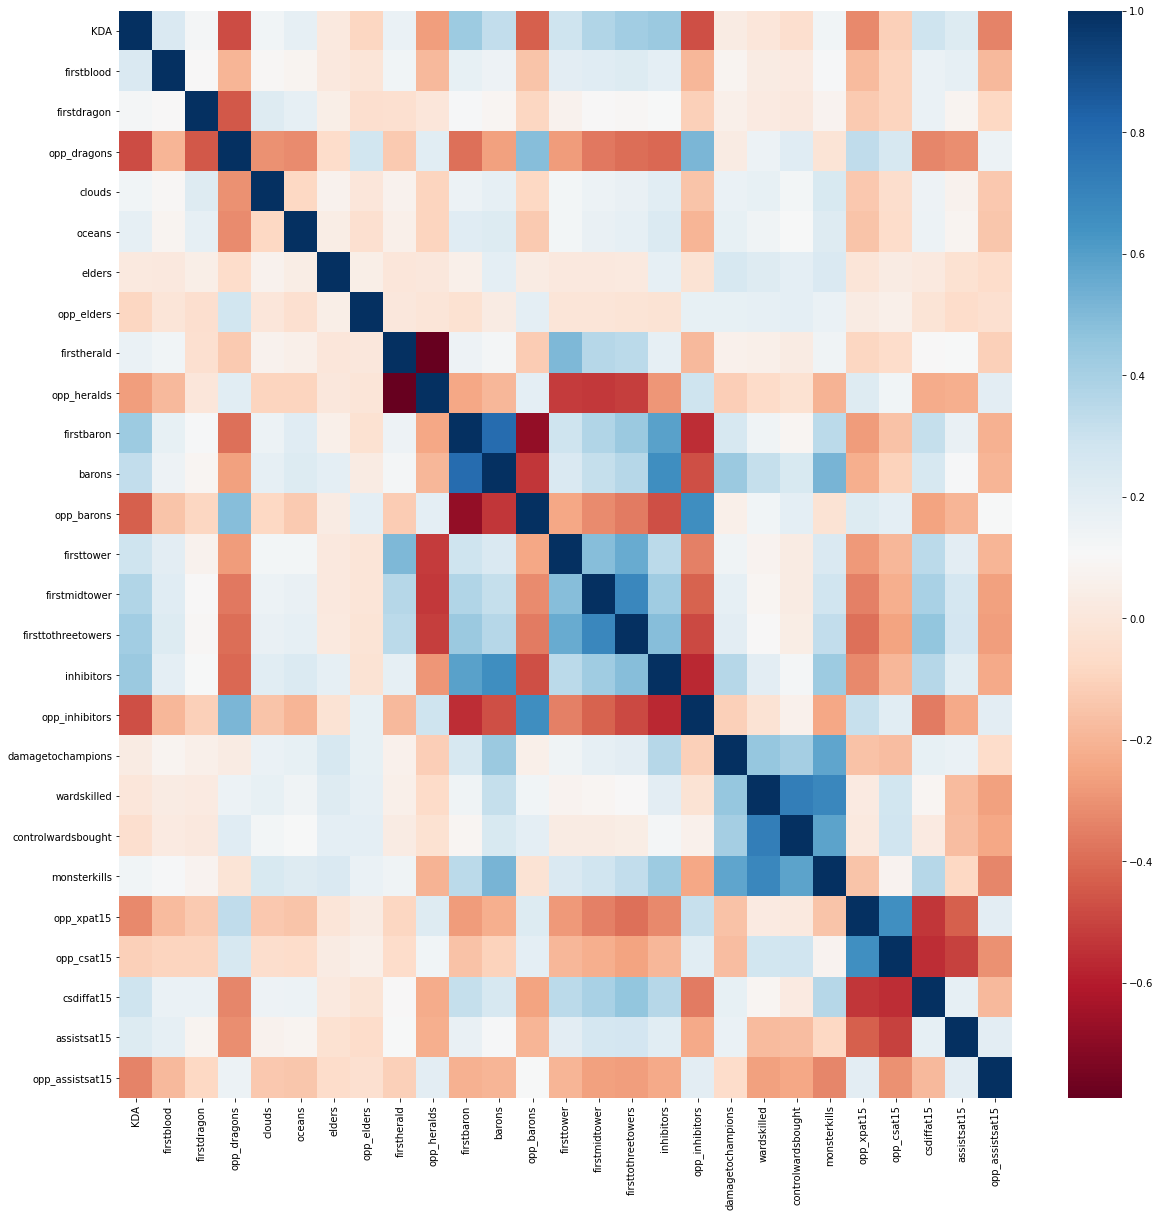

In [56]:
plt.subplots(figsize=(20,20))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [54]:
def plots(new_remove_df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

<ipython-input-54-23730d426def>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(13,5))


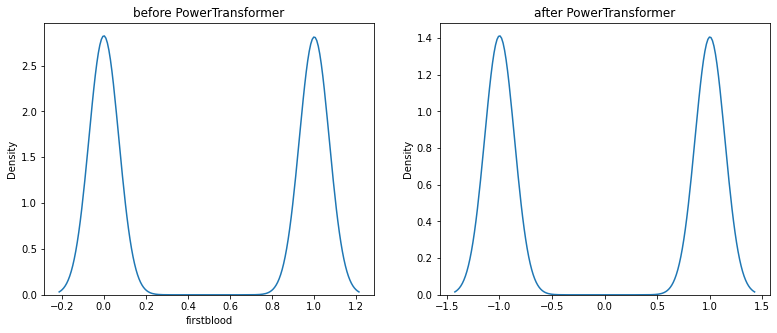

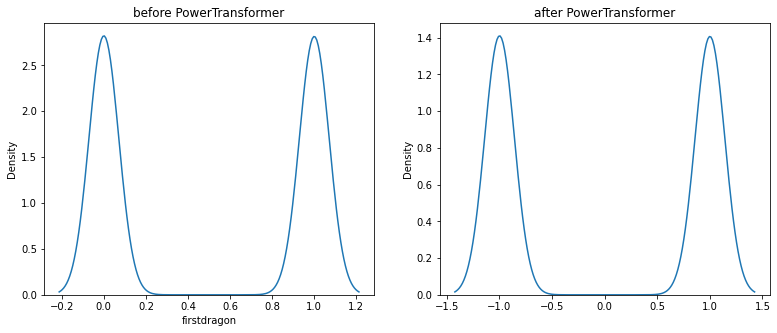

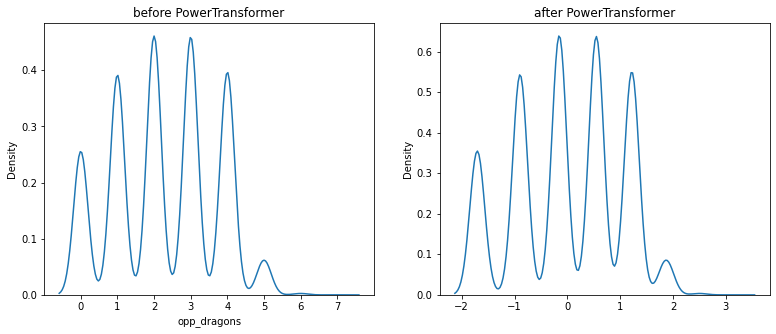

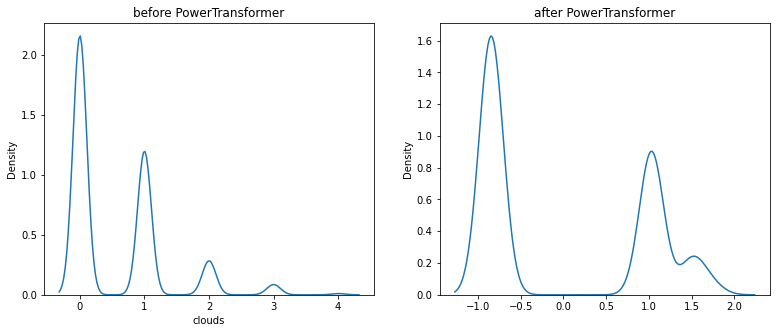

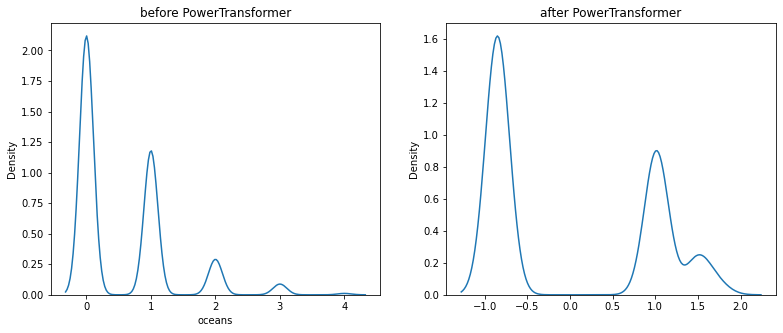

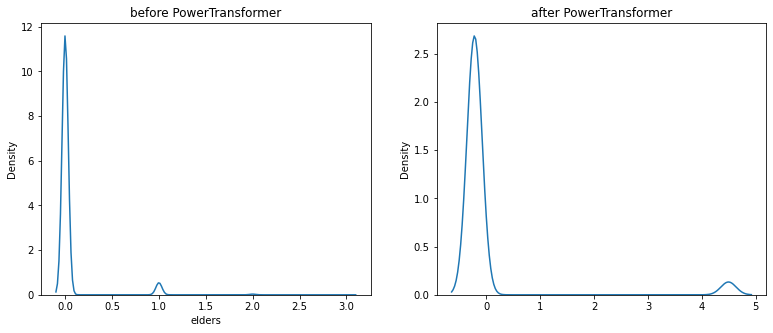

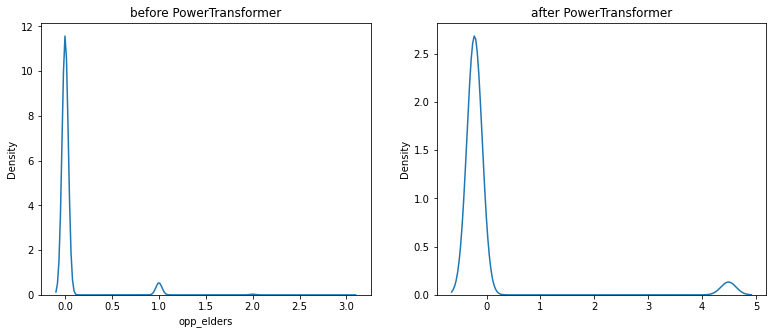

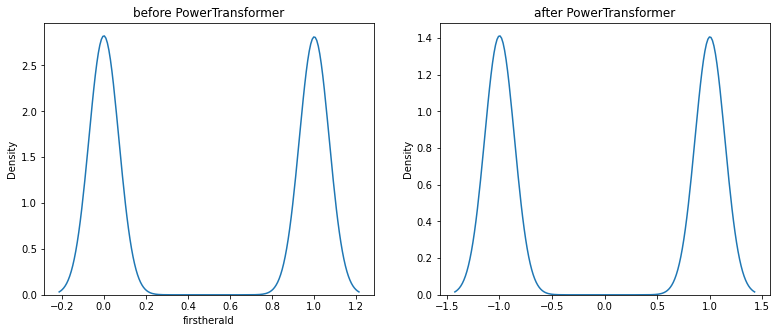

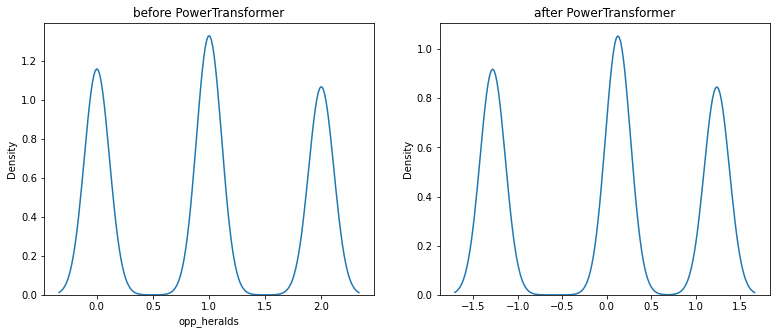

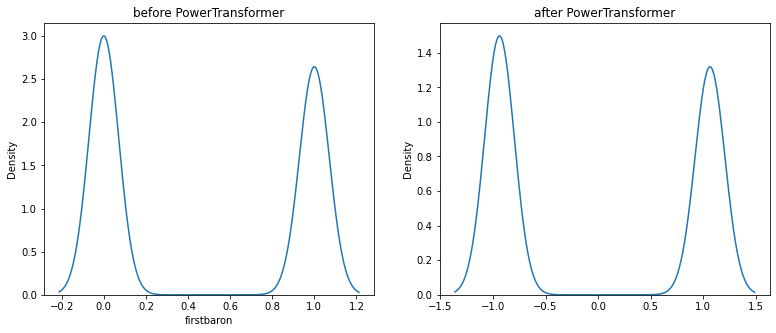

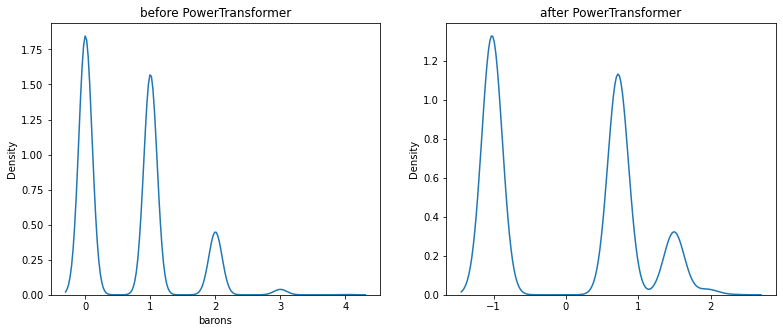

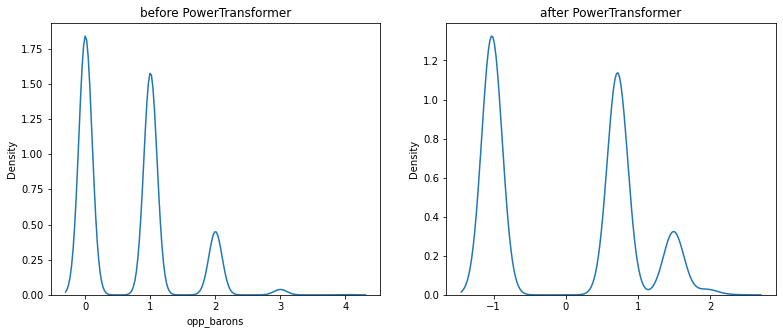

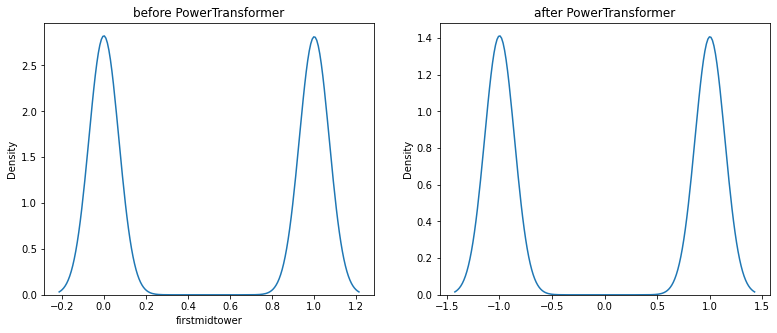

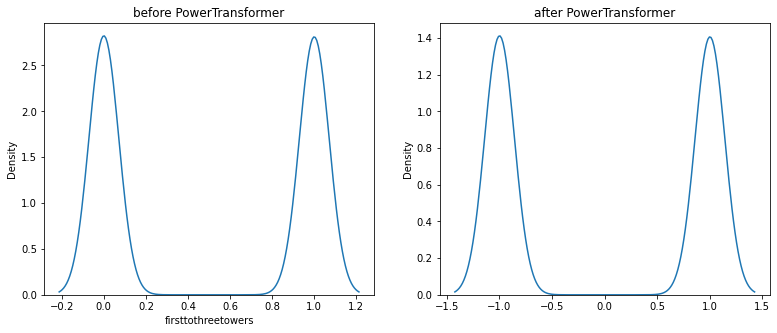

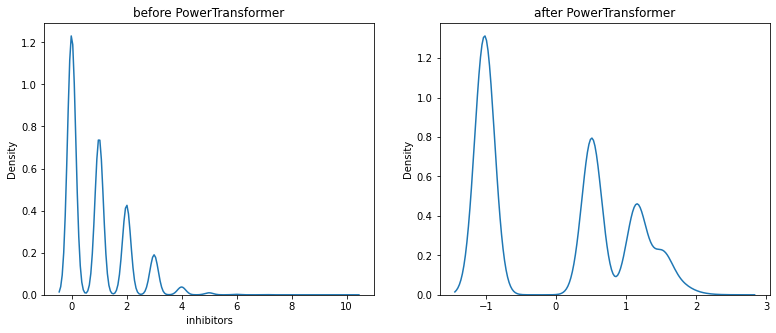

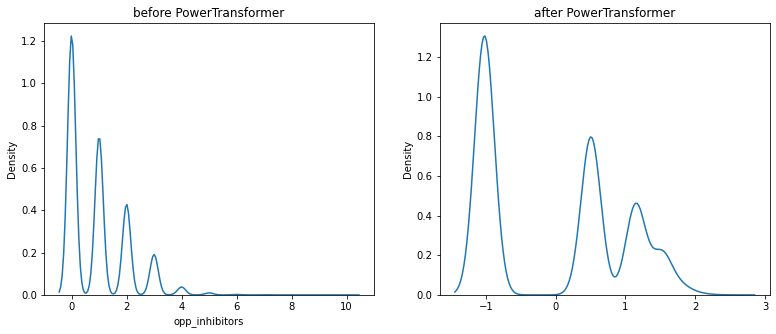

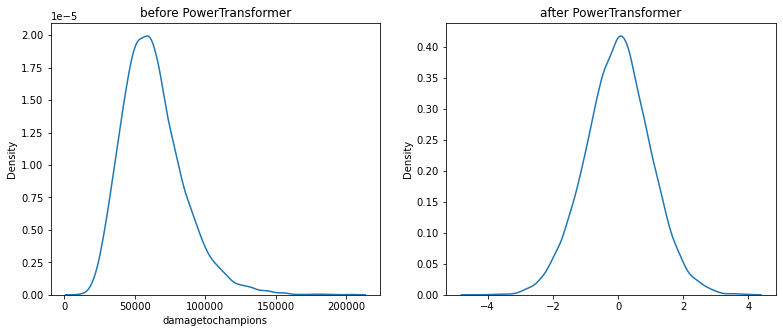

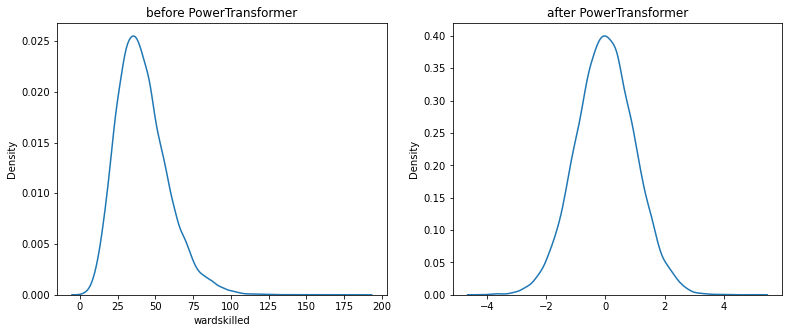

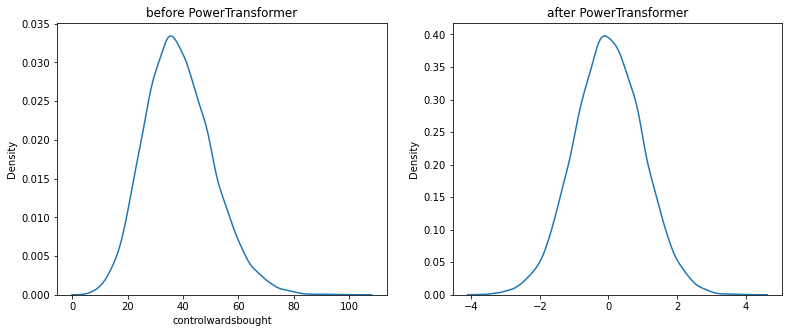

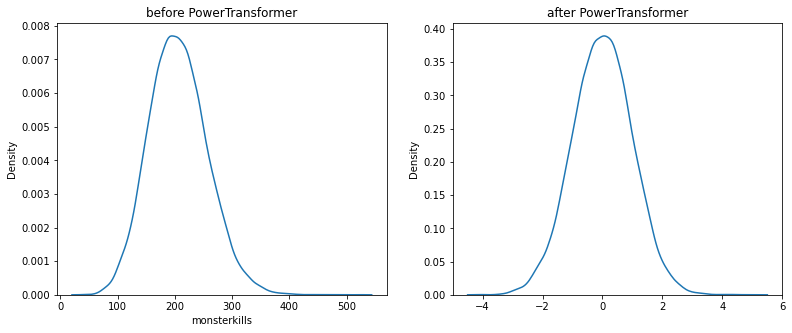

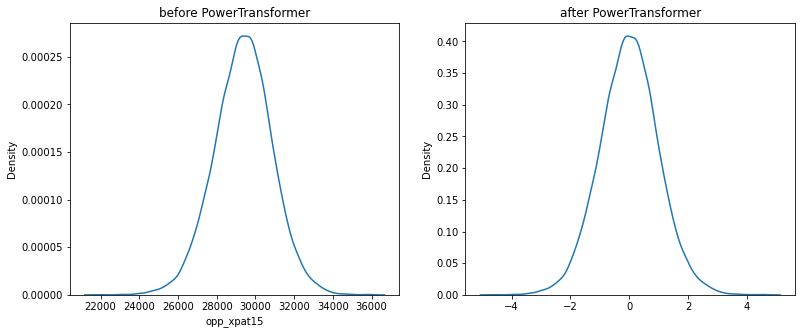

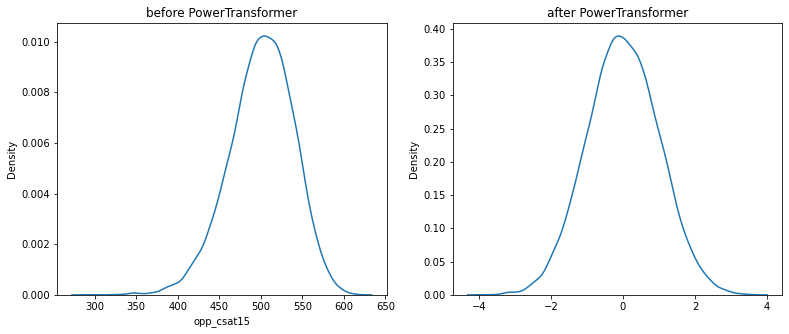

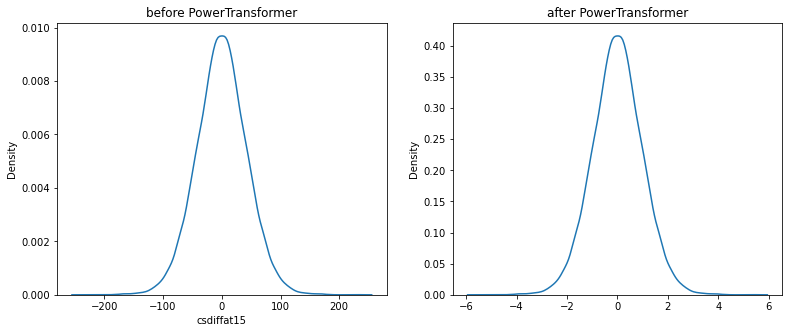

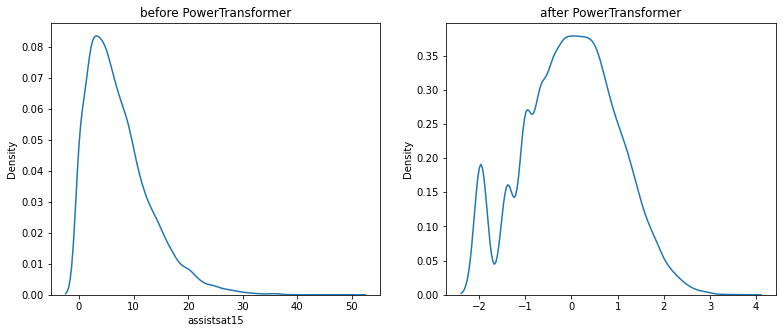

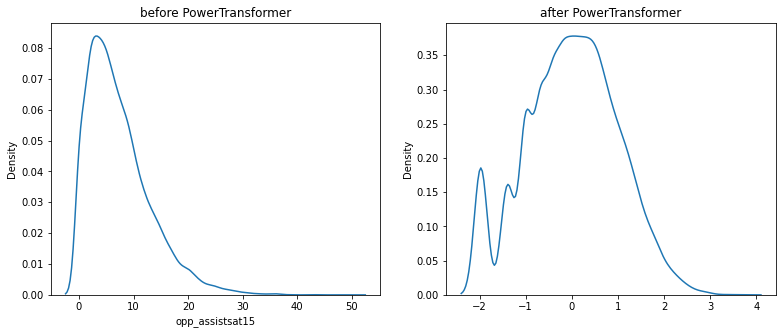

In [55]:
for col in X.columns:
    plots(X, col, PowerTransformer(method='yeo-johnson'))

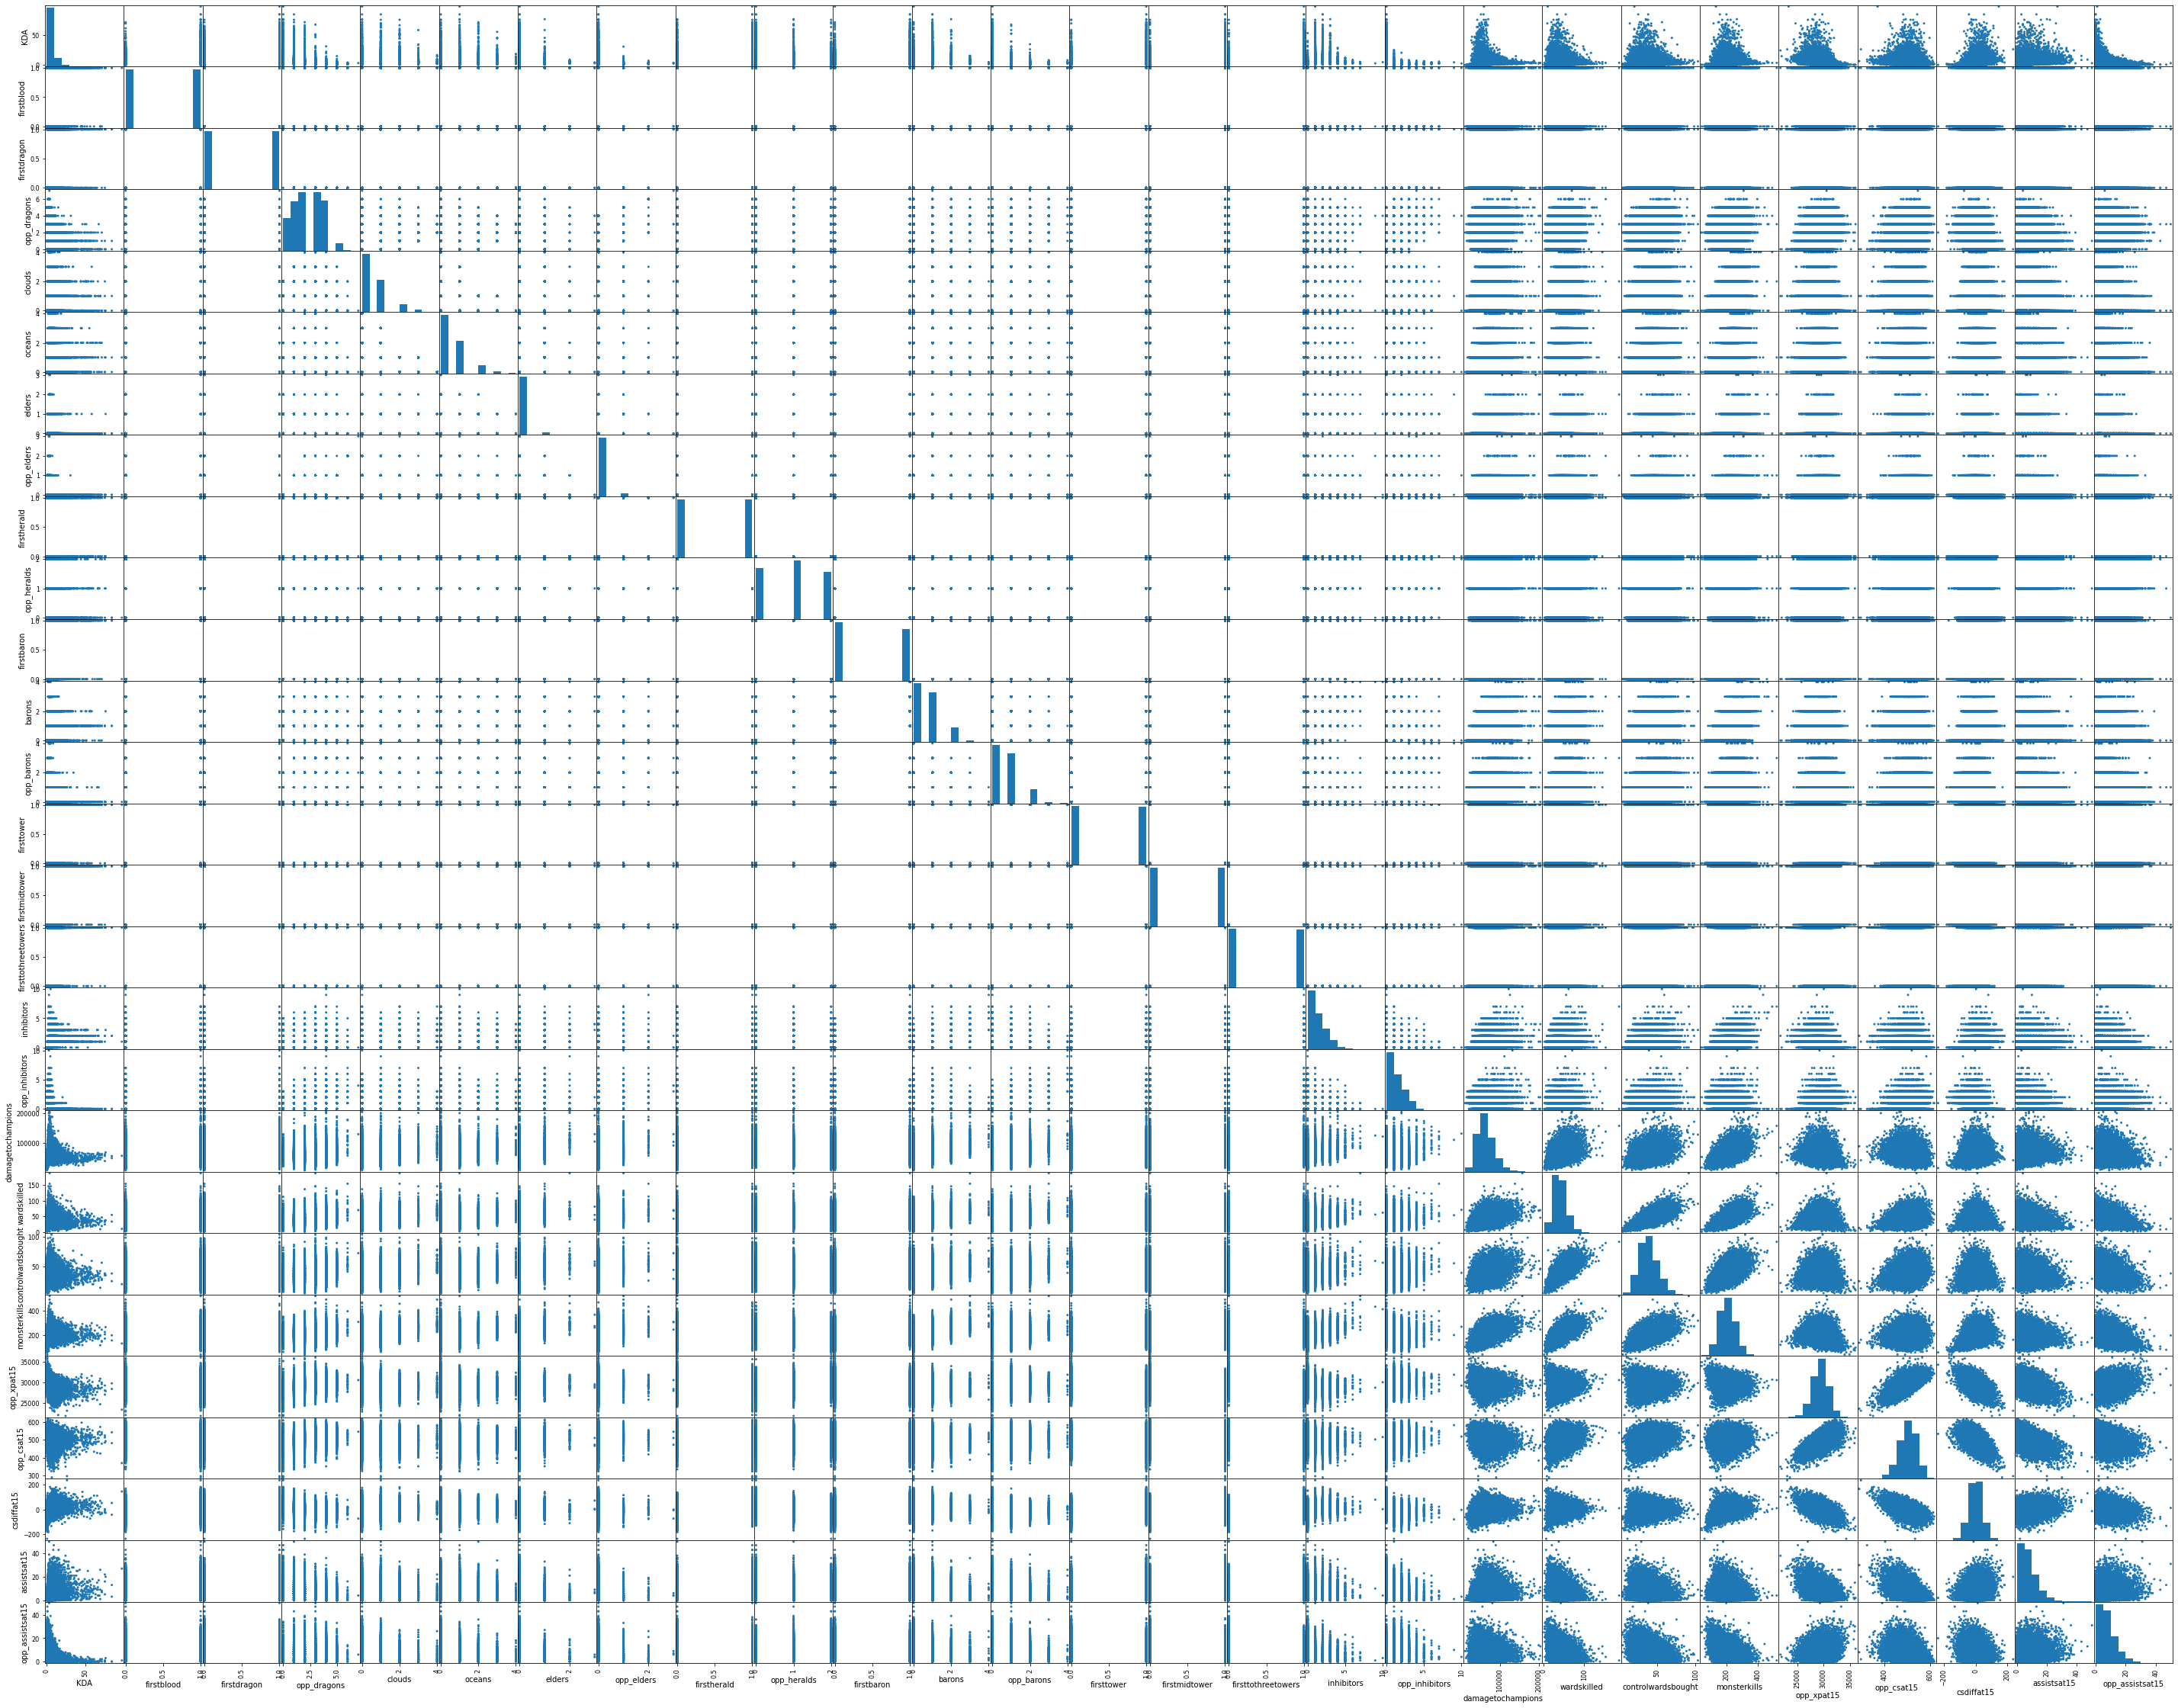

In [57]:
pd.plotting.scatter_matrix(df_after, alpha = 1, figsize = (50, 40))

# show the plot
plt.show()

In [65]:
df_after.hist(grid=False,
       figsize=(200, 200),
       bins=30)

array([[<AxesSubplot:title={'center':'KDA'}>,
        <AxesSubplot:title={'center':'firstblood'}>,
        <AxesSubplot:title={'center':'firstdragon'}>,
        <AxesSubplot:title={'center':'opp_dragons'}>,
        <AxesSubplot:title={'center':'clouds'}>],
       [<AxesSubplot:title={'center':'oceans'}>,
        <AxesSubplot:title={'center':'elders'}>,
        <AxesSubplot:title={'center':'opp_elders'}>,
        <AxesSubplot:title={'center':'firstherald'}>,
        <AxesSubplot:title={'center':'opp_heralds'}>],
       [<AxesSubplot:title={'center':'firstbaron'}>,
        <AxesSubplot:title={'center':'barons'}>,
        <AxesSubplot:title={'center':'opp_barons'}>,
        <AxesSubplot:title={'center':'firsttower'}>,
        <AxesSubplot:title={'center':'firstmidtower'}>],
       [<AxesSubplot:title={'center':'firsttothreetowers'}>,
        <AxesSubplot:title={'center':'inhibitors'}>,
        <AxesSubplot:title={'center':'opp_inhibitors'}>,
        <AxesSubplot:title={'center':'damagetoc

## Remove Outliers

In [16]:
# get the summary
desc_df = df_after.describe()


# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,KDA,firstblood,firstdragon,opp_dragons,clouds,oceans,elders,opp_elders,firstherald,opp_heralds,...,opp_inhibitors,damagetochampions,wardskilled,controlwardsbought,monsterkills,opp_xpat15,opp_csat15,csdiffat15,assistsat15,opp_assistsat15
count,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,...,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000,17597.000000
mean,5.488891,0.498892,0.499403,2.269023,0.551628,0.561062,0.050009,0.050122,0.499006,0.974314,...,0.906291,63131.524578,41.603171,38.631528,206.173836,29363.892879,500.619822,-0.069841,7.307211,7.320850
std,6.796027,0.500013,0.500014,1.388920,0.754405,0.763811,0.231375,0.231596,0.500013,0.790889,...,1.064003,21993.303828,16.820387,12.174297,50.801978,1504.282979,38.784843,42.954803,5.758382,5.756553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10144.000000,2.000000,5.000000,42.000000,21819.000000,289.000000,-237.000000,0.000000,0.000000
25%,1.360000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,47670.000000,30.000000,30.000000,171.000000,28393.000000,476.000000,-28.000000,3.000000,3.000000
50%,3.290000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,60411.000000,39.000000,38.000000,204.000000,29391.000000,503.000000,0.000000,6.000000,6.000000
75%,7.330000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,2.000000,75144.000000,51.000000,46.000000,239.000000,30359.000000,528.000000,28.000000,10.000000,10.000000
max,97.000000,1.000000,1.000000,7.000000,4.000000,4.000000,3.000000,3.000000,1.000000,2.000000,...,10.000000,204351.000000,186.000000,103.000000,522.000000,36028.000000,617.000000,237.000000,50.000000,50.000000
+3_std,25.876972,1.998931,1.999445,6.435785,2.814842,2.852495,0.744134,0.744910,1.999045,3.346980,...,4.098300,129111.436062,92.064333,75.154419,358.579770,33876.741815,616.974352,128.794567,24.582359,24.590508
-3_std,-14.899189,-1.001147,-1.000638,-1.897738,-1.711586,-1.730372,-0.644117,-0.644666,-1.001034,-1.398353,...,-2.285718,-2848.386906,-8.857991,2.108637,53.767903,24851.043944,384.265292,-128.934250,-9.967936,-9.948808


In [17]:
# filter the data frame to remove the values exceeding 3 standard deviations
new_remove_df = df_after[(np.abs(stats.zscore(df_after)) < 3).all(axis=1)]

# what rows were removed
df_after.index.difference(new_remove_df.index)

Int64Index([   16,    17,    20,    36,    37,    50,    51,    53,    58,
               59,
            ...
            17539, 17551, 17556, 17563, 17564, 17565, 17566, 17568, 17573,
            17574],
           dtype='int64', length=3616)

In [18]:
new_remove_df

,KDA,firstblood,firstdragon,opp_dragons,clouds,oceans,elders,opp_elders,firstherald,opp_heralds,...,opp_inhibitors,damagetochampions,wardskilled,controlwardsbought,monsterkills,opp_xpat15,opp_csat15,csdiffat15,assistsat15,opp_assistsat15
0,16.00,1,1,0,0,1,0,0,1,0,...,0,73968,45,44,310,29074,490,86,13,4
1,0.38,0,0,4,0,0,0,0,0,2,...,2,33521,40,37,123,33329,576,-86,4,13
2,1.39,1,0,4,0,0,0,0,1,0,...,1,43465,30,37,192,31723,566,-49,9,5
3,8.71,0,1,0,1,2,0,0,0,1,...,0,76657,36,39,221,29844,517,49,5,9
4,1.30,1,0,4,0,0,0,0,1,0,...,2,43080,42,35,137,29267,514,-40,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,0.91,0,1,1,1,0,0,0,1,1,...,2,64965,18,29,164,30199,516,-22,4,9
17593,1.43,0,0,4,0,0,0,0,0,2,...,3,79912,33,47,208,29626,477,-27,5,11
17594,5.07,1,1,1,1,0,0,0,1,0,...,0,84463,61,56,213,25778,450,27,11,5
17595,1.19,1,0,3,0,0,0,0,1,1,...,3,62057,32,40,177,29893,473,-21,6,9


In [19]:
new_remove_df=new_remove_df.drop('firsttower', axis = 1)

## Building Model

In [52]:
X = new_remove_df.drop('KDA', axis = 1) 
Y = new_remove_df[['KDA']]

## Spliting traing and test data set

In [56]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

## Regression model 

In [57]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 9.454
----------------------------------------------------------------------------------------------------
The Coefficient for firstblood is 0.38
The Coefficient for firstdragon is -0.49
The Coefficient for opp_dragons is -0.85
The Coefficient for clouds is -0.2
The Coefficient for oceans is 0.0072
The Coefficient for elders is 5.6e-17
The Coefficient for opp_elders is -3.3e-16
The Coefficient for firstherald is -0.03
The Coefficient for opp_heralds is -0.074
The Coefficient for firstbaron is 1.6
The Coefficient for barons is -0.31
The Coefficient for opp_barons is -0.47
The Coefficient for firstmidtower is 0.33
The Coefficient for firsttothreetowers is 0.63
The Coefficient for inhibitors is 0.9
The Coefficient for opp_inhibitors is -0.61
The Coefficient for damagetochampions is -3.7e-06
The Coefficient for wardskilled is -0.0039
The Coefficient for controlwardsbought is -0.0095
The Coefficient for monsterkills is -0.0027
The Coefficient for opp_xpat15 is

To interpret the slope coefficient we divide it by 100.

coef(lm3)["log(x)"]/100
     log(x) 
0.001997892 

This tells us that a 1% increase in x increases the dependent variable by about 0.002. Why does it tell us this? Let’s do some math. Below we calculate the change in y when changing x from 1 to 1.01 (ie, a 1% increase).

In [58]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[ 6.37629146],
       [-0.82188314],
       [ 2.2282431 ],
       [ 4.03257745],
       [ 9.98712403]])

In [59]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [60]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 8.29
MAE 2.01
RMSE 2.88


In [61]:
# estimate the p-values
est.pvalues

const                  3.538175e-37
firstblood             3.167796e-13
firstdragon            1.557759e-15
opp_dragons           5.404391e-155
clouds                 2.063523e-04
oceans                 9.715769e-01
elders                 1.941943e-37
opp_elders             4.162670e-39
firstherald            7.774198e-01
opp_heralds            8.248514e-02
firstbaron             1.188698e-48
barons                 4.708610e-05
opp_barons             7.829757e-12
firstmidtower          5.932203e-06
firsttothreetowers     4.386397e-14
inhibitors            1.848179e-118
opp_inhibitors         4.504951e-55
damagetochampions      5.090276e-02
wardskilled            2.275771e-01
controlwardsbought     4.059034e-03
monsterkills           1.144608e-03
opp_xpat15             1.623134e-41
opp_csat15             5.971353e-45
csdiffat15             8.812382e-09
assistsat15            5.528781e-68
opp_assistsat15       2.507484e-103
dtype: float64

In [62]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.62


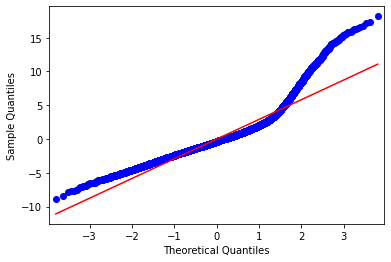

The mean of the residuals is 1.066e-11


In [63]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [64]:
est.conf_int()

,0,1
const,7.718106e+00,1.051519e+01
firstblood,2.797376e-01,4.853331e-01
firstdragon,-5.852556e-01,-3.544729e-01
opp_dragons,-8.845506e-01,-7.642301e-01
clouds,-2.499389e-01,-7.719766e-02
oceans,-8.670166e-02,8.360581e-02
elders,-2.142235e-13,-1.574208e-13
opp_elders,-8.165532e-14,-6.043172e-14
firstherald,-1.848268e-01,1.382351e-01
opp_heralds,-2.156312e-01,1.304063e-02


In [65]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    KDA   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1003.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:20:30   Log-Likelihood:                -34782.
No. Observations:               13981   AIC:                         6.961e+04
Df Residuals:                   13957   BIC:                         6.979e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.1166      0

 ## Model 2

In [66]:
new_remove_df=new_remove_df.drop(['damagetochampions','opp_elders','opp_heralds','opp_dragons','opp_barons','opp_inhibitors','opp_xpat15'], axis = 1)

In [67]:
new_remove_df

,KDA,firstblood,firstdragon,clouds,oceans,elders,firstherald,firstbaron,barons,firstmidtower,firsttothreetowers,inhibitors,wardskilled,controlwardsbought,monsterkills,opp_csat15,csdiffat15,assistsat15,opp_assistsat15
0,16.00,1,1,0,1,0,1,1,1,1,1,2,45,44,310,490,86,13,4
1,0.38,0,0,0,0,0,0,0,0,0,0,0,40,37,123,576,-86,4,13
2,1.39,1,0,0,0,0,1,0,0,0,0,0,30,37,192,566,-49,9,5
3,8.71,0,1,1,2,0,0,1,1,1,1,1,36,39,221,517,49,5,9
4,1.30,1,0,0,0,0,1,0,0,0,1,0,42,35,137,514,-40,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,0.91,0,1,1,0,0,1,0,0,0,0,0,18,29,164,516,-22,4,9
17593,1.43,0,0,0,0,0,0,0,0,0,0,0,33,47,208,477,-27,5,11
17594,5.07,1,1,1,0,0,1,1,2,1,1,3,61,56,213,450,27,11,5
17595,1.19,1,0,0,0,0,1,0,0,0,0,0,32,40,177,473,-21,6,9


In [68]:
X = new_remove_df.drop('KDA', axis = 1) 
Y = new_remove_df[['KDA']]

In [69]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [70]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -1.729
----------------------------------------------------------------------------------------------------
The Coefficient for firstblood is 0.44
The Coefficient for firstdragon is 0.14
The Coefficient for clouds is 0.15
The Coefficient for oceans is 0.35
The Coefficient for elders is 9.3e-15
The Coefficient for firstherald is 0.017
The Coefficient for firstbaron is 2.7
The Coefficient for barons is -0.38
The Coefficient for firstmidtower is 0.59
The Coefficient for firsttothreetowers is 1.0
The Coefficient for inhibitors is 1.4
The Coefficient for wardskilled is -0.0099
The Coefficient for controlwardsbought is -0.028
The Coefficient for monsterkills is -0.0074
The Coefficient for opp_csat15 is 0.013
The Coefficient for csdiffat15 is 0.011
The Coefficient for assistsat15 is 0.16
The Coefficient for opp_assistsat15 is -0.2


In [71]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[6.78544177],
       [1.4072252 ],
       [0.32366935],
       [4.66315244],
       [8.41792367]])

In [72]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [73]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 9.17
MAE 2.07
RMSE 3.03


In [74]:
# estimate the p-values
est.pvalues

const                  1.097084e-03
firstblood             2.567875e-15
firstdragon            2.081052e-02
clouds                 1.159412e-04
oceans                 9.094371e-15
elders                 9.940891e-04
firstherald            1.807846e-01
firstbaron            3.727611e-133
barons                 5.673792e-06
firstmidtower          1.667726e-14
firsttothreetowers     1.922613e-32
inhibitors            2.578661e-266
wardskilled            1.398586e-03
controlwardsbought     3.477967e-15
monsterkills           8.216673e-17
opp_csat15             3.293064e-31
csdiffat15             1.178344e-31
assistsat15           6.718428e-136
opp_assistsat15       4.246691e-217
dtype: float64

In [75]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.58


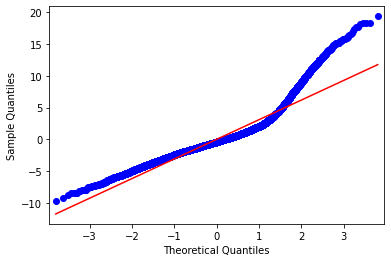

The mean of the residuals is -3.115e-14


In [76]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [77]:
est.conf_int()

,0,1
const,-3.026449e+00,-7.558129e-01
firstblood,3.319668e-01,5.503527e-01
firstdragon,2.019925e-02,2.454596e-01
clouds,8.557666e-02,2.625648e-01
oceans,2.580661e-01,4.325051e-01
elders,6.034934e-15,2.378651e-14
firstherald,-3.589302e-02,1.904298e-01
firstbaron,2.449720e+00,2.869752e+00
barons,-5.554574e-01,-2.204553e-01
firstmidtower,4.379699e-01,7.380298e-01


In [78]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    KDA   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     1107.
Date:                Wed, 16 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:20:46   Log-Likelihood:                -35636.
No. Observations:               13981   AIC:                         7.131e+04
Df Residuals:                   13963   BIC:                         7.144e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8911      0